<a href="https://colab.research.google.com/github/RazvanGolan/Faculty-3rd-year/blob/main/pi/lab3/pi_exercises_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import torch
from torch import nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.utils.data import DataLoader, random_split

In [31]:
# exercise 1
n = 60
eps = torch.normal(0,0.1, (n, 1))
batch_size = 10
num_iter = 25
true_w = 1
true_b = 1

X = torch.normal(0, 1, (n, 1))
X = torch.clamp(X, min=-3, max=3)
y = X - 1 + eps

def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator."""
    dataset = torch.utils.data.TensorDataset(*data_arrays)
    return torch.utils.data.DataLoader(dataset, batch_size, shuffle=is_train)

data_iter = load_array((X, y), batch_size)

net = nn.Sequential(nn.Linear(1, 1))

# setting the weight and bias to 1
net[0].weight.data.fill_(1)
net[0].bias.data.fill_(1)

loss = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.05)

# training the model
for iter in range(num_iter):
    for X_iter, y_iter in data_iter:
        l = loss(net(X_iter), y_iter)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    l = loss(net(X), y)

print(f"Learned model weight: {true_w} vs actual weight {net[0].weight.data}")
print(f"Learned model bias: {true_b} vs actual bias {net[0].bias.data}")

Learned model weight: 1 vs actual weight tensor([[1.0144]])
Learned model bias: 1 vs actual bias tensor([-1.0167])


In [51]:
# exercise 2 -> training the model

batch_size = 100
num_epochs = 15

trans = transforms.ToTensor()

mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=trans)

# Split the dataset into training and validation sets
train_size = 30000
val_size = len(mnist_dataset) - train_size
train_dataset, val_dataset = random_split(mnist_dataset, [train_size, val_size])

# Load data into batches
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Load test dataset
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=trans)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

loss = nn.CrossEntropyLoss()

lr = 0.15
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

def train_epoch(net, train_iter, loss, optimizer):
    # Set the model to training mode
    net.train()
    # Sum of training loss, sum of training correct predictions, no. of examples
    total_loss = 0
    total_hits = 0
    total_samples = 0
    for X, y in train_iter:
        # Compute gradients and update parameters
        y_hat = net(X)
        l = loss(y_hat, y)
        # Using PyTorch built-in optimizer & loss criterion
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        total_loss += float(l)
        total_hits += sum(y_hat.argmax(axis=1).type(y.dtype) == y)
        total_samples += y.numel()
    # Return training loss and training accuracy
    return float(total_loss) / len(train_iter), float(total_hits) / total_samples  * 100

def evaluate_accuracy(net, data_iter):
    """Compute the accuracy for a model on a dataset."""
    net.eval()  # Set the model to evaluation mode

    total_loss = 0
    total_hits = 0
    total_samples = 0
    with torch.no_grad():
        for X, y in data_iter:
            y_hat = net(X)
            l = loss(y_hat, y)
            total_loss += float(l)
            total_hits += sum(net(X).argmax(axis=1).type(y.dtype) == y)
            total_samples += y.numel()
    return float(total_loss) / len(data_iter), float(total_hits) / total_samples  * 100

def train(net, train_iter, val_iter, loss, num_epochs, optimizer):
    """Train a model."""
    train_loss_all = []
    train_acc_all = []
    val_loss_all = []
    val_acc_all = []
    for epoch in range(num_epochs):
        train_loss, train_acc = train_epoch(net, train_iter, loss, optimizer)
        train_loss_all.append(train_loss)
        train_acc_all.append(train_acc)
        val_loss, val_acc = evaluate_accuracy(net, val_iter)
        val_loss_all.append(val_loss)
        val_acc_all.append(val_acc)
        print(f'Epoch {epoch + 1}, Train loss {train_loss:.2f}, Train accuracy {train_acc:.2f}, Validation loss {val_loss:.2f}, Validation accuracy {val_acc:.2f}')

    return train_loss_all, train_acc_all, val_loss_all, val_acc_all

train_loss_all, train_acc_all, val_loss_all, val_acc_all = train(net, train_loader, test_loader, loss, num_epochs, optimizer)

Epoch 1, Train loss 0.58, Train accuracy 85.91, Validation loss 0.39, Validation accuracy 89.78
Epoch 2, Train loss 0.37, Train accuracy 89.93, Validation loss 0.34, Validation accuracy 90.68
Epoch 3, Train loss 0.34, Train accuracy 90.66, Validation loss 0.32, Validation accuracy 91.08
Epoch 4, Train loss 0.32, Train accuracy 90.97, Validation loss 0.31, Validation accuracy 91.32
Epoch 5, Train loss 0.31, Train accuracy 91.35, Validation loss 0.31, Validation accuracy 91.34
Epoch 6, Train loss 0.30, Train accuracy 91.58, Validation loss 0.30, Validation accuracy 91.45
Epoch 7, Train loss 0.29, Train accuracy 91.76, Validation loss 0.30, Validation accuracy 91.67
Epoch 8, Train loss 0.29, Train accuracy 91.96, Validation loss 0.30, Validation accuracy 91.82
Epoch 9, Train loss 0.28, Train accuracy 92.13, Validation loss 0.29, Validation accuracy 91.79
Epoch 10, Train loss 0.28, Train accuracy 92.20, Validation loss 0.29, Validation accuracy 91.85
Epoch 11, Train loss 0.28, Train accura

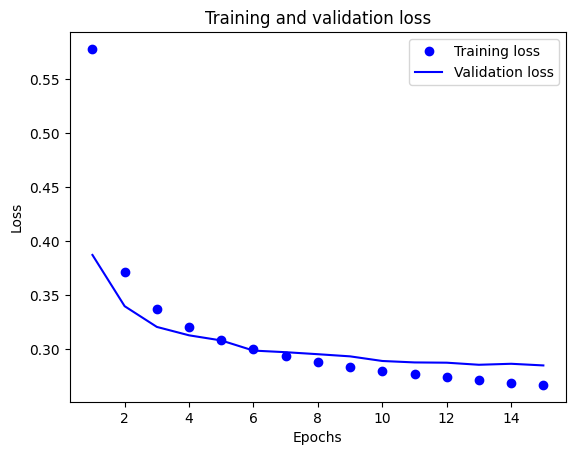

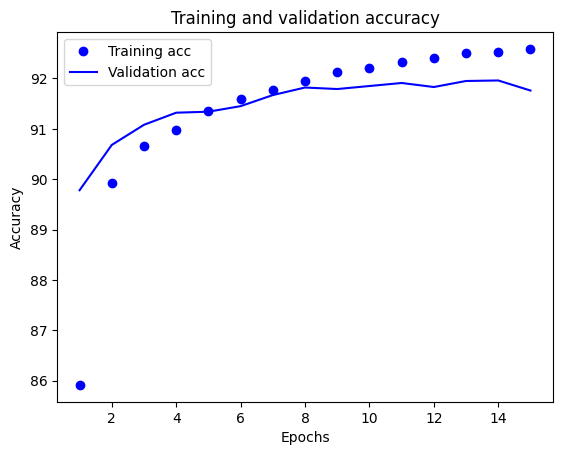

Test loss 0.28, Test accuracy 91.76


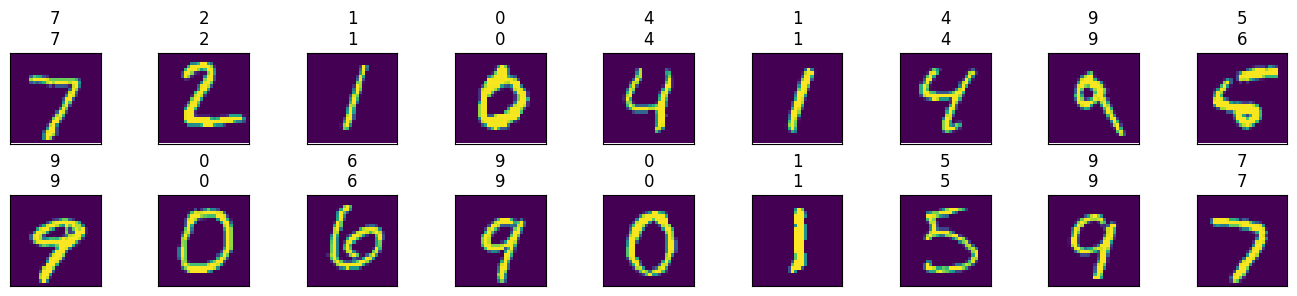

In [52]:
# exercise 2 -> plotting the results

def plot_loss(train_loss_all, val_loss_all):
    epochs = range(1, len(train_loss_all) + 1)
    plt.plot(epochs, train_loss_all, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_all, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(train_loss_all, val_loss_all)

def plot_accuracy(train_acc_all, val_acc_all):
    epochs = range(1, len(train_acc_all) + 1)
    plt.plot(epochs, train_acc_all, 'bo', label='Training acc')
    plt.plot(epochs, val_acc_all, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_accuracy(train_acc_all, val_acc_all)

test_loss, test_acc = evaluate_accuracy(net, test_loader)
print(f'Test loss {test_loss:.2f}, Test accuracy {test_acc:.2f}')

def get_mnist_labels(labels):
    """Convert numerical labels to their string representation for MNIST."""
    text_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """Plot a list of images."""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    plt.tight_layout()
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # Tensor Image
            ax.imshow(img.numpy())
        else:
            # PIL Image
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

def predict(net, test_iter, n=18):
    """Predict labels."""
    for X, y in test_iter:
        break
    trues = get_mnist_labels(y)
    preds = get_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    show_images(X[0:n].reshape((n, 28, 28)), 2, int(n/2), titles=titles[0:n])

predict(net, test_loader)

In [54]:
# exercise 3

batch_size = 512
lr = 0.15
num_epochs = 10

trans = transforms.ToTensor()

# Load the MNIST dataset
mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=trans)

# Split the dataset into training and validation sets (45,000 train, 15,000 val)
train_size = 45000
val_size = 15000
train_dataset, val_dataset = random_split(mnist_dataset, [train_size, val_size])

# Create data loaders for the training, validation, and test datasets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Load the test dataset
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=trans)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class MLP(nn.Module):
    # Declare a layer with model parameters. Here, we declare two fully
    # connected layers
    def __init__(self):
        # Call the constructor of the `MLP` parent class `nn.Module` to perform
        # the necessary initialization. In this way, other function arguments
        # can also be specified during class instantiation, such as the model
        # parameters
        super().__init__()
        self.hidden1 = nn.Linear(28 * 28, 256)  # First hidden layer
        self.hidden2 = nn.Linear(256, 256) # Second hidden layer
        self.out = nn.Linear(256, 10)  # Output layer

        self.dropout = nn.Dropout(0.4) # Dropout with probability 40%

        # Xavier initialization
        self.initialize_weights()

    def forward(self, X):
        X = X.view(-1, 28 * 28)

        X = torch.tanh(self.hidden1(X))
        X = self.dropout(X)

        X = torch.tanh(self.hidden2(X))
        X = self.dropout(X)
        return self.out(X)

    def initialize_weights(self):
        # Apply Xavier initialization to weights and set biases to zero
        nn.init.xavier_uniform_(self.hidden1.weight)
        nn.init.xavier_uniform_(self.hidden2.weight)
        nn.init.xavier_uniform_(self.out.weight)
        nn.init.zeros_(self.hidden1.bias)
        nn.init.zeros_(self.hidden2.bias)
        nn.init.zeros_(self.out.bias)

net = MLP()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)

train_loss_all, train_acc_all, val_loss_all, val_acc_all = train(net, train_loader, test_loader, loss, num_epochs, optimizer)

Epoch 1, Train loss 0.72, Train accuracy 78.38, Validation loss 0.37, Validation accuracy 89.79
Epoch 2, Train loss 0.41, Train accuracy 87.65, Validation loss 0.32, Validation accuracy 91.04
Epoch 3, Train loss 0.37, Train accuracy 88.82, Validation loss 0.30, Validation accuracy 91.66
Epoch 4, Train loss 0.35, Train accuracy 89.51, Validation loss 0.28, Validation accuracy 91.85
Epoch 5, Train loss 0.34, Train accuracy 89.95, Validation loss 0.28, Validation accuracy 91.98
Epoch 6, Train loss 0.33, Train accuracy 90.22, Validation loss 0.27, Validation accuracy 92.19
Epoch 7, Train loss 0.32, Train accuracy 90.56, Validation loss 0.26, Validation accuracy 92.55
Epoch 8, Train loss 0.31, Train accuracy 90.96, Validation loss 0.26, Validation accuracy 92.64
Epoch 9, Train loss 0.30, Train accuracy 91.07, Validation loss 0.26, Validation accuracy 92.73
Epoch 10, Train loss 0.29, Train accuracy 91.25, Validation loss 0.26, Validation accuracy 92.65


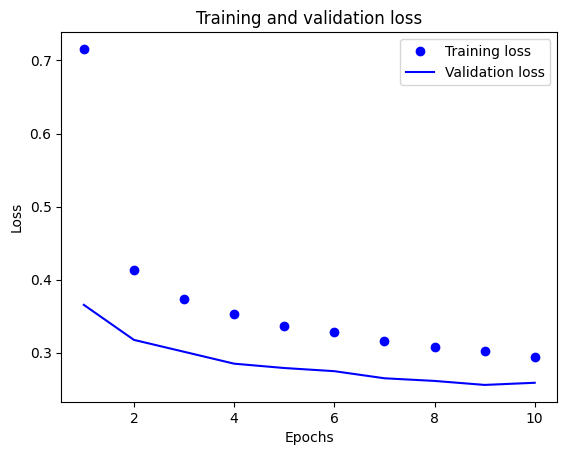

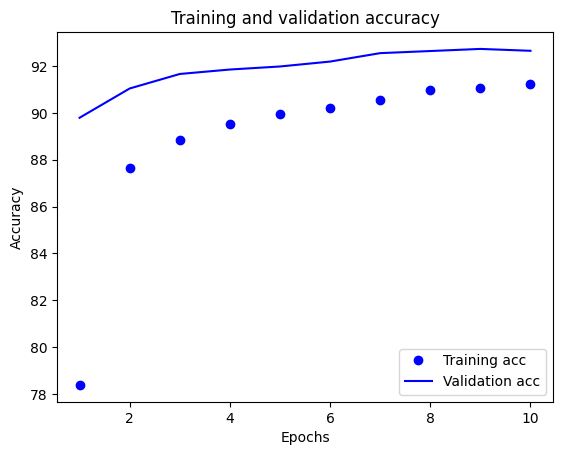

Test loss 0.26, Test accuracy 92.65


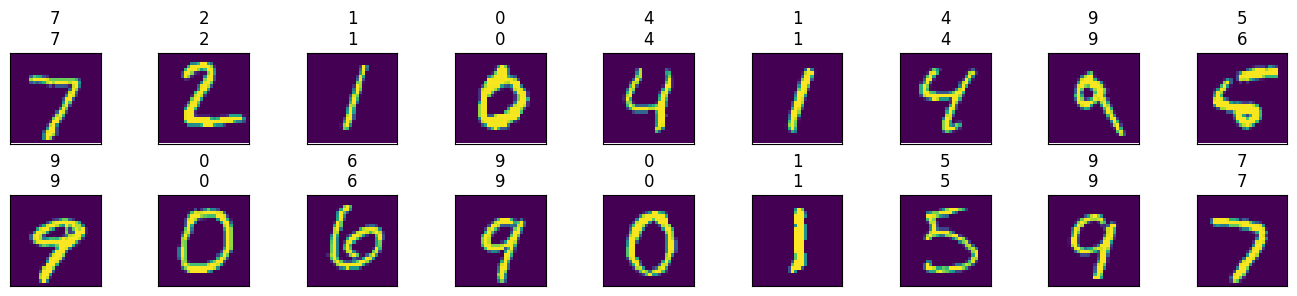

In [55]:
plot_loss(train_loss_all, val_loss_all)
plot_accuracy(train_acc_all, val_acc_all)

test_loss, test_acc = evaluate_accuracy(net, test_loader)
print(f'Test loss {test_loss:.2f}, Test accuracy {test_acc:.2f}')

predict(net, test_loader)